# Regressão Logística I
## Tarefa II

Vamos trabalhar com a mesma base do exercício anterior, mas vamos aprofundar um pouco mais a nossa regressão.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df['flag_doente'] = (df['num']!=0).astype('int64')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0


A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    float64
 1   sex          303 non-null    float64
 2   cp           303 non-null    float64
 3   trestbps     303 non-null    float64
 4   chol         303 non-null    float64
 5   fbs          303 non-null    float64
 6   restecg      303 non-null    float64
 7   thalach      303 non-null    float64
 8   exang        303 non-null    float64
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    float64
 11  ca           303 non-null    object 
 12  thal         303 non-null    object 
 13  num          303 non-null    int64  
 14  flag_doente  303 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memory usage: 35.6+ KB


1. Considere o script que monta a análise bivariada que você fez na tarefa anterior. Transforme esse script em uma função, que deve:
- Ter como parâmetros de entrada:
    - Um *dataframe* contendo os dados a serem avaliados
    - Um *string* contendo o nome da variável resposta
    - Um *string* contendo o nome da variável explicativa
- E deve retornar um *dataframe* com os dados da bivariada. 
**Monte** a mesma bivariada pelo menos três variáveis qualitativas do *data-frame*. Qual delas parece discriminar mais o risco?

In [4]:
def bivariada(df,resposta,explicativa):
    tab = pd.crosstab(df[explicativa],df[resposta],margins=True)
    tab['probabilidade'] = tab.iloc[:,1]/tab.iloc[:,2]
    tab['odds'] = tab.iloc[:,1]/tab.iloc[:,0]
    
    tab['odds ratio total'] = tab.iloc[:,4]/tab.loc['All':,'odds'][0]
    tab['log odds'] = np.log(tab.iloc[:,4])
    tab['WOE log odds ratio'] = np.log(tab.iloc[:,5])
    return tab

In [5]:
bivariada(df,'flag_doente','sex')

flag_doente,0,1,All,probabilidade,odds,odds ratio total,log odds,WOE log odds ratio
sex,,,,,,,,
0.0,72,25,97,0.257732,0.347222,0.409672,-1.057790,-0.892398
1.0,92,114,206,0.553398,1.239130,1.461996,0.214410,0.379802
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [6]:
bivariada(df,'flag_doente','slope')

flag_doente,0,1,All,probabilidade,odds,odds ratio total,log odds,WOE log odds ratio
slope,,,,,,,,
1.0,106,36,142,0.253521,0.339623,0.400706,-1.079920,-0.914528
2.0,49,91,140,0.650000,1.857143,2.191161,0.619039,0.784432
3.0,9,12,21,0.571429,1.333333,1.573141,0.287682,0.453075
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [7]:
bivariada(df,'flag_doente','fbs')

flag_doente,0,1,All,probabilidade,odds,odds ratio total,log odds,WOE log odds ratio
fbs,,,,,,,,
0.0,141,117,258,0.453488,0.829787,0.979030,-0.186586,-0.021193
1.0,23,22,45,0.488889,0.956522,1.128558,-0.044452,0.120941
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [8]:
bivariada(df,'flag_doente','cp')

flag_doente,0,1,All,probabilidade,odds,odds ratio total,log odds,WOE log odds ratio
cp,,,,,,,,
1.0,16,7,23,0.304348,0.437500,0.516187,-0.826679,-0.661286
2.0,41,9,50,0.180000,0.219512,0.258993,-1.516347,-1.350955
3.0,68,18,86,0.209302,0.264706,0.312315,-1.329136,-1.163743
4.0,39,105,144,0.729167,2.692308,3.176536,0.990399,1.155791
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


2. Monte uma função semelhante para categorizar variáveis quantitativas contínuas (com muitas categorias) como ```age```.  
    Além dos mesmos parâmetros da função anterior, defina mais um parâmetro como número de categorias que você deseja quebrar. Defina um valor '*default*' de 5 grupos para este parâmetro.  

In [9]:
def bivariada_categ(df,resposta,explicativa, k=5):
    df[explicativa] = pd.cut(df[explicativa],bins=k)
    tab = pd.crosstab(df[explicativa],df[resposta],margins=True)
    tab['probabilidade'] = tab.iloc[:,1]/tab.iloc[:,2]
    tab['odds'] = tab.iloc[:,1]/tab.iloc[:,0]
    
    tab['odds ratio total'] = tab.iloc[:,4]/tab.loc['All':,'odds'][0]
    tab['log odds'] = np.log(tab.iloc[:,4])
    tab['WOE log odds ratio'] = np.log(tab.iloc[:,5])
    return tab


In [10]:
bivariada_categ(df,'flag_doente','age')

flag_doente,0,1,All,probabilidade,odds,odds ratio total,log odds,WOE log odds ratio
age,,,,,,,,
"(28.952, 38.6]",8,3,11,0.272727,0.375000,0.442446,-0.980829,-0.815437
"(38.6, 48.2]",50,21,71,0.295775,0.420000,0.495540,-0.867501,-0.702108
"(48.2, 57.8]",56,41,97,0.422680,0.732143,0.863823,-0.311780,-0.146387
"(57.8, 67.4]",40,67,107,0.626168,1.675000,1.976259,0.515813,0.681206
"(67.4, 77.0]",10,7,17,0.411765,0.700000,0.825899,-0.356675,-0.191282
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


In [11]:
bivariada_categ(df,'flag_doente','trestbps')

flag_doente,0,1,All,probabilidade,odds,odds ratio total,log odds,WOE log odds ratio
trestbps,,,,,,,,
"(93.894, 115.2]",32,20,52,0.384615,0.625000,0.737410,-0.470004,-0.304611
"(115.2, 136.4]",79,62,141,0.439716,0.784810,0.925963,-0.242313,-0.076921
"(136.4, 157.6]",44,39,83,0.469880,0.886364,1.045782,-0.120628,0.044765
"(157.6, 178.8]",8,14,22,0.636364,1.750000,2.064748,0.559616,0.725008
"(178.8, 200.0]",1,4,5,0.800000,4.000000,4.719424,1.386294,1.551687
All,164,139,303,0.458746,0.847561,1.000000,-0.165392,0.000000


3. Construa um modelo de regressão logística com as variáveis qualitativas: ```sex + cp +  trestbps``` e com a variável quantitativa ```age```.

**Interprete os parâmetros.**

In [15]:
reglog = smf.logit('flag_doente ~ sex+cp+trestbps+age',data=df).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.495207
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      292
Method:                           MLE   Df Model:                           10
Date:                Wed, 08 Feb 2023   Pseudo R-squ.:                  0.2820
Time:                        10:42:24   Log-Likelihood:                -150.05
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 1.358e-20
======================================================================================================================
                                                         coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             -6.3367      1.136     -5.580      0.000      -8.563      -4.111
trestbps[T.Interval(115.2, 136.4, closed='right')]     0.5298      0.413      1.282      0.200      -0.280       1.340
trestbps[T.Interval(136.4, 157.6, closed='right')]     0.2935      0.440      0.668      0.504      -0.568       1.155
trestbps[T.Interval(157.6, 178.8, closed='right')]     1.3709      0.673      2.038      0.042       0.052       2.690
trestbps[T.Interval(178.8, 200.0, closed='right')]     2.5312      1.221      2.072      0.038       0.137       4.925
age[T.Interval(38.6, 48.2, closed='right')]           -0.2865      0.858     -0.334      0.738      -1.968       1.395
age[T.Interval(48.2, 57.8, closed='right')]            0.2195      0.835      0.263      0.793      -1.417       1.856
age[T.Interval(57.8, 67.4, closed='right')]            1.3753      0.844      1.629      0.103      -0.279       3.030
age[T.Interval(67.4, 77.0, closed='right')]            0.5187      1.028      0.505      0.614      -1.495       2.533
sex                                                    1.9051      0.346      5.501      0.000       1.226       2.584
cp                                                     1.1875      0.177      6.703      0.000       0.840       1.535
======================================================================================================================
"""

4. Avalie o seu modelo quanto a **calibragem**:
- Calcule a probabilidade de evento predita segundo o seu modelo
- Categorize essa probabilidade em G=5 grupos
- Calcule a probabilidade de evento predita média por grupo
- Calcule a taxa de eventos (média da variável indicadora de eventos) por grupo
- Compare graficamente o valor eperado versus observado para a taxa de maus por grupo

In [17]:
df['predito'] = reglog.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,"(57.8, 67.4]",1.0,1.0,"(136.4, 157.6]",233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.171459
1,"(57.8, 67.4]",1.0,4.0,"(157.6, 178.8]",286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.955410
2,"(57.8, 67.4]",1.0,4.0,"(115.2, 136.4]",229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.902342
3,"(28.952, 38.6]",1.0,3.0,"(115.2, 136.4]",250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.415987
4,"(38.6, 48.2]",0.0,2.0,"(115.2, 136.4]",204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.023697


In [18]:
cat_pred = pd.qcut(df['predito'],5,duplicates='drop')
cat_pred.value_counts().sort_index()

(0.0119, 0.14]    66
(0.14, 0.347]     55
(0.347, 0.579]    63
(0.579, 0.744]    63
(0.744, 0.955]    56
Name: predito, dtype: int64

In [22]:
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns={'flag_doente':'contagem'})
qualid

,contagem
predito,
"(0.0119, 0.14]",66
"(0.14, 0.347]",55
"(0.347, 0.579]",63
"(0.579, 0.744]",63
"(0.744, 0.955]",56


In [23]:
qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,predito
predito,,
"(0.0119, 0.14]",66,0.075537
"(0.14, 0.347]",55,0.243382
"(0.347, 0.579]",63,0.461800
"(0.579, 0.744]",63,0.681549
"(0.744, 0.955]",56,0.867813


In [24]:
qualid['pct_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito,pct_doente
predito,,,
"(0.0119, 0.14]",66,0.075537,0.075758
"(0.14, 0.347]",55,0.243382,0.236364
"(0.347, 0.579]",63,0.461800,0.396825
"(0.579, 0.744]",63,0.681549,0.746032
"(0.744, 0.955]",56,0.867813,0.875000


Text(0.5, 0, 'Grupo')

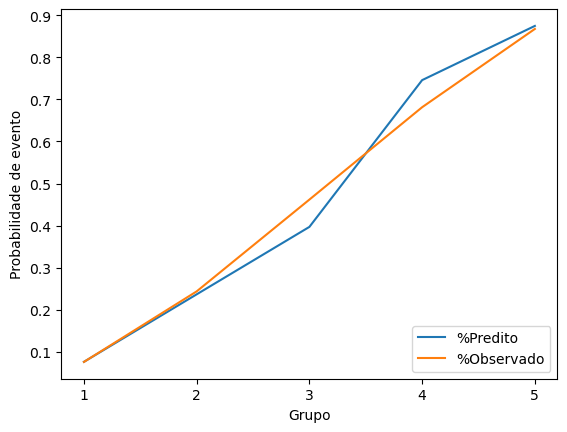

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_doente'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

5. Avalie o seu modelo quanto a discriminação calculando acurácia, GINI e KS.

In [38]:
from sklearn import metrics
from scipy.stats import ks_2samp
from sklearn.metrics import roc_curve

In [30]:
#acurácia
acc = metrics.accuracy_score(df['flag_doente'],df['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 79.54%


In [39]:
#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito'])
auc_ = metrics.auc(fpr, tpr)
print('AUC: {0:.2f}%'.format(auc_*100))

AUC: 84.72%


In [40]:
#GINI
gini = 2*auc_ -1
print('GINI: {0:.2f}%'.format(gini*100))

GINI: 69.44%


6. tente melhorar o modelo obtido, por exemplo inserindo ou removendo variáveis.  
    Avalie as características do seu modelo (calibragem e acurácia).

In [62]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito
0,"(57.8, 67.4]",1.0,1.0,"(136.4, 157.6]",233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.171459
1,"(57.8, 67.4]",1.0,4.0,"(157.6, 178.8]",286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.955410
2,"(57.8, 67.4]",1.0,4.0,"(115.2, 136.4]",229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.902342
3,"(28.952, 38.6]",1.0,3.0,"(115.2, 136.4]",250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.415987
4,"(38.6, 48.2]",0.0,2.0,"(115.2, 136.4]",204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.023697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,"(38.6, 48.2]",1.0,1.0,"(93.894, 115.2]",264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1,0.028452
299,"(67.4, 77.0]",1.0,4.0,"(136.4, 157.6]",193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1,0.755963
300,"(48.2, 57.8]",1.0,4.0,"(115.2, 136.4]",131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1,0.744168
301,"(48.2, 57.8]",0.0,2.0,"(115.2, 136.4]",236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1,0.038702


In [66]:
reglog2 = smf.logit('flag_doente ~ sex+cp+restecg+exang+slope',data=df).fit()
reglog2.summary()

Optimization terminated successfully.
         Current function value: 0.471630
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            flag_doente   No. Observations:                  303
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            5
Date:                Wed, 08 Feb 2023   Pseudo R-squ.:                  0.3162
Time:                        12:40:55   Log-Likelihood:                -142.90
converged:                       True   LL-Null:                       -208.99
Covariance Type:            nonrobust   LLR p-value:                 8.223e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4025      0.822     -7.786      0.000      -8.014      -4.791
sex            1.5504      0.337      4.595      0.000       0.889       2.212
cp             0.8603      0.169      5.098      0.000       0.530       1.191
restecg        0.3146      0.149      2.110      0.035       0.022       0.607
exang          1.2592      0.333      3.777      0.000       0.606       1.913
slope          1.0401      0.250      4.160      0.000       0.550       1.530
==============================================================================
"""

In [67]:
df['predito2'] = reglog2.predict(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente,predito,predito2
0,"(57.8, 67.4]",1.0,1.0,"(136.4, 157.6]",233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0,0.171459,0.439746
1,"(57.8, 67.4]",1.0,4.0,"(157.6, 178.8]",286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1,0.955410,0.928084
2,"(57.8, 67.4]",1.0,4.0,"(115.2, 136.4]",229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1,0.902342,0.928084
3,"(28.952, 38.6]",1.0,3.0,"(115.2, 136.4]",250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,0.415987,0.700374
4,"(38.6, 48.2]",0.0,2.0,"(115.2, 136.4]",204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0,0.023697,0.046861


In [68]:
cat_pred = pd.qcut(df['predito2'],5,duplicates='drop')
cat_pred.value_counts().sort_index()
group_reg = df.groupby(cat_pred)
qualid = group_reg[['flag_doente']].count().rename(columns={'flag_doente':'contagem'})
qualid

,contagem
predito2,
"(0.009999999999999998, 0.128]",63
"(0.128, 0.284]",58
"(0.284, 0.564]",62
"(0.564, 0.818]",59
"(0.818, 0.973]",61


In [69]:
qualid['predito2'] = group_reg['predito2'].mean()
qualid

,contagem,predito2
predito2,,
"(0.009999999999999998, 0.128]",63,0.081021
"(0.128, 0.284]",58,0.201986
"(0.284, 0.564]",62,0.429140
"(0.564, 0.818]",59,0.694079
"(0.818, 0.973]",61,0.895461


In [70]:
qualid['pct_doente'] = group_reg['flag_doente'].mean()
qualid

,contagem,predito2,pct_doente
predito2,,,
"(0.009999999999999998, 0.128]",63,0.081021,0.079365
"(0.128, 0.284]",58,0.201986,0.189655
"(0.284, 0.564]",62,0.429140,0.419355
"(0.564, 0.818]",59,0.694079,0.711864
"(0.818, 0.973]",61,0.895461,0.901639


Text(0.5, 0, 'Grupo')

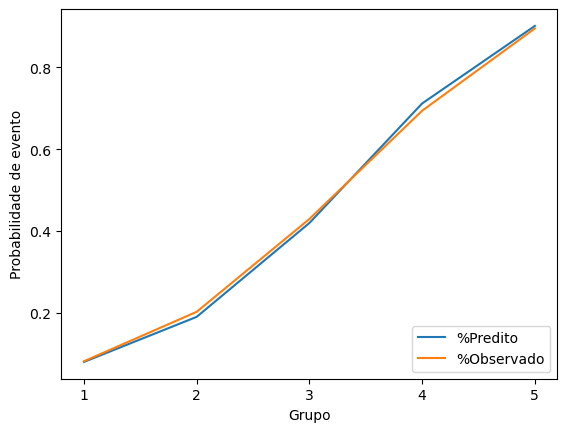

In [71]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_doente'].plot(label='%Predito')
ax = qualid['predito2'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')

In [72]:
#acurácia
acc = metrics.accuracy_score(df['flag_doente'],df['predito2']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 78.88%


In [73]:
#AUC
fpr, tpr, thresholds = metrics.roc_curve(df['flag_doente'], df['predito2'])
auc_ = metrics.auc(fpr, tpr)
print('AUC: {0:.2f}%'.format(auc_*100))

AUC: 85.28%


In [74]:
#GINI
gini = 2*auc_ -1
print('GINI: {0:.2f}%'.format(gini*100))

GINI: 70.56%
